# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

## In this project, we will analyze a dataset of used vehicles to determine the key factors that drive pricing. 
### Using the CRISP-DM framework, we will 
- **first clean and process the data to ensure accuracy and reliability**
- **Then, we will apply exploratory data analysis (EDA) and statistical modeling techniques to uncover trends in vehicle pricing.**
- **By identifying which factors—such as make, model, mileage, condition, and location—have the strongest impact on price**
- **we can develop data-driven pricing recommendations**

These insights will help the dealership optimize inventory pricing, maximize profit margins, and align pricing strategies with customer demand.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### As part of Data Understanding (CRISP-DM), will explore the dataset and understand its structure, contents and potential data quality issues. Will follow below steps:

- Identifying the variables (features) included in the dataset.
- Understanding the data types of each variable.
- Checking for missing values or inconsistencies.
- Exploring summary statistics to identify patterns or potential outliers.

In [269]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
filterwarnings('ignore')

In [270]:
# Load vehicles dataset
df_original = pd.read_csv("data/vehicles.csv")

# Display basic information about the dataset
#df_original.info()

In [271]:
# Show the first few rows to understand the structure
df_original.head(11)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [272]:
# Since data set is almost close to 1/2 million, for better understanding check for missing values in each column
print("\nmissing Values \n", df_original.isnull().sum())

# Get summary statistics for numerical variables
df_original.describe()


missing Values 
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [273]:
# Get the unique values for categorical columns
categorical_columns = df_original.select_dtypes(include=['object']).columns
print("Count of Unique values")
for col in categorical_columns:
    print(f"{col}: ",df_original[col].nunique())

Count of Unique values
region:  404
manufacturer:  42
model:  29649
condition:  6
cylinders:  8
fuel:  5
title_status:  6
transmission:  3
VIN:  118246
drive:  3
size:  4
type:  13
paint_color:  12
state:  51


In [274]:
# Get the unique values for categorical columns
#for col in categorical_columns:
#    print("Column: ", col, df_original[col].value_counts())#, "Unique count:", df_original[col].nunique())

In [275]:
# Check for duplicates
df_original.duplicated().sum()
df_original_no_vind = df_original.sample(n=50000, random_state=42)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [276]:
# DROP IRRELEVANT 'id' and 'VIN' do not help price prediction and region to some extent
df_original_no_vind = df_original.drop(columns=["id", "VIN", "region"])

# Drop empty rows missing too many important fields
df_original_no_vind = df_original_no_vind.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

In [277]:
# TARGET VARIABLE: PRICE
# Remove rows with zero or extremely low price (likely incorrect)
df_original_no_vind = df_original_no_vind[df_original_no_vind["price"] > 500]   # keep only reasonable car prices

# Optional: log-transform price to reduce extreme skew
df_original_no_vind["price_log"] = np.log(df_original_no_vind["price"])

In [278]:
# Identify numeric & categorical columns
numeric_cols = df_original_no_vind.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df_original_no_vind.select_dtypes(include=["object"]).columns.tolist()

# Remove the target from numeric columns
numeric_cols = [col for col in numeric_cols if col not in ["price", "price_log"]]
#df_original_no_vind.info()

In [279]:
#Age of car
df_original_no_vind["car_age"] = (2025 - df_original_no_vind["year"])

#Mileage per year 
df_original_no_vind["miles_per_year"] = (df_original_no_vind["odometer"] / df_original_no_vind["car_age"])
df_original_no_vind["miles_per_year"] = df_original_no_vind["miles_per_year"].replace([np.inf, -np.inf], np.nan)

#Convert cylinder count numerical value (e.g., "6 cylinders" → 6)
if "cylinders" in df_original_no_vind.columns:
    df_original_no_vind["cylinders_num"] = df_original_no_vind["cylinders"].str.extract(r"(\d+)").astype(float)
else:
    df_original_no_vind["cylinders_num"] = np.nan

#Convert condition into numerical value
condition_map = {    "new": 5,    "like new": 4,    "excellent": 3,    "good": 2,    "fair": 1,    "salvage": 0}
if "condition" in df_original_no_vind.columns:
    df_original_no_vind["condition_num"] = df_original_no_vind["condition"].map(condition_map)
else:
    df_original_no_vind["condition_num"] = np.nan

# Add engineered numeric columns
numeric_cols.extend(["car_age", "miles_per_year", "cylinders_num", "condition_num"])
#df_original_no_vind.info()

In [280]:
# HIGH-CARDINALITY COLUMNS → FREQUENCY ENCODING
high_card_cols = []
for col in ["model", "region"]:
    if col in df_original_no_vind.columns and df_original_no_vind[col].dtype == "object":
        high_card_cols.append(col)
        freq_col = col + "_freq"
        vc = df_original_no_vind[col].value_counts()
        df_original_no_vind[freq_col] = df_original_no_vind[col].map(vc).astype(float)

y = df_original_no_vind["price_log"]
X = df_original_no_vind.drop(columns=["price", "price_log"])

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Remove high-cardinality columns from categorical (we encoded them numerically)
for col in high_card_cols:
    if col in categorical_cols:
        categorical_cols.remove(col)

print("\n\nhigh_card_cols = ", high_card_cols, "\nnumeric_cols = ", numeric_cols, "\ncategorical_cols = ", categorical_cols,"\n")



high_card_cols =  ['model'] 
numeric_cols =  ['year', 'odometer', 'car_age', 'miles_per_year', 'cylinders_num', 'condition_num', 'model_freq'] 
categorical_cols =  ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'] 



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [281]:
# TRAIN / TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Preprocessing Pipeline 
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop",
    sparse_threshold=0.3
)

In [ ]:
# LinearRegression Model Pipeline
model_linear = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])
# Fit the model
model_linear.fit(X_train, y_train)
print("Model training completed successfully!")
y_pred = model_linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Linear Regression - MSE: ", mse, ", RMSE: ", rmse)

# Extract feature names
ohe = model_linear.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_features = ohe.get_feature_names_out(categorical_cols)
all_features = list(numeric_cols) + list(cat_features)

coefficients = model_linear.named_steps["model"].coef_
linear_importance_df = (
    pd.DataFrame({"feature": all_features, "importance": coefficients})
    .sort_values("importance", key=abs, ascending=False)
)
print(linear_importance_df.head(20))

Model training completed successfully!
Linear Regression - MSE:  0.4113294917876986 , RMSE:  0.6413497421748127
                       feature  importance
18        manufacturer_ferrari    1.753891
16         manufacturer_datsun    1.187010
42         manufacturer_saturn   -0.783149
39        manufacturer_porsche    0.568332
34        manufacturer_mercury   -0.563428
9    manufacturer_aston-martin    0.526118
44          manufacturer_tesla    0.456200
70     title_status_parts only   -0.455259
62                 fuel_diesel    0.401353
50              condition_good    0.400217
19           manufacturer_fiat   -0.375801
15       manufacturer_chrysler   -0.366797
29     manufacturer_land rover   -0.355473
36     manufacturer_mitsubishi   -0.340638
58       cylinders_5 cylinders   -0.336948
38        manufacturer_pontiac   -0.315788
68           title_status_lien    0.310624
32          manufacturer_mazda   -0.304900
49              condition_fair   -0.296896
108                   state_

In [290]:
#Ridge Regression Model
model_ridge = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", Ridge(alpha=1.0))
])
# Fit the model
model_ridge.fit(X_train, y_train)
print("Model training completed successfully!")
y_pred = model_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Ridge Regression - MSE: ", mse, ", RMSE: ", rmse)

# Extract feature names
ohe = model_ridge.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_features = ohe.get_feature_names_out(categorical_cols)
all_features = list(numeric_cols) + list(cat_features)

coefficients = model_ridge.named_steps["model"].coef_
ridge_importance_df = (
    pd.DataFrame({"feature": all_features, "importance": coefficients})
    .sort_values("importance", key=abs, ascending=False)
)
print(ridge_importance_df.head(20))

Model training completed successfully!
Ridge Regression - MSE:  0.4113046940582548 , RMSE:  0.6413304094289112
                       feature  importance
18        manufacturer_ferrari    1.723386
16         manufacturer_datsun    1.174679
42         manufacturer_saturn   -0.784684
39        manufacturer_porsche    0.565134
34        manufacturer_mercury   -0.563592
44          manufacturer_tesla    0.456801
70     title_status_parts only   -0.448366
62                 fuel_diesel    0.401546
50              condition_good    0.400121
19           manufacturer_fiat   -0.372713
15       manufacturer_chrysler   -0.366735
36     manufacturer_mitsubishi   -0.341369
58       cylinders_5 cylinders   -0.335766
38        manufacturer_pontiac   -0.315442
68           title_status_lien    0.309435
32          manufacturer_mazda   -0.304213
49              condition_fair   -0.296715
9    manufacturer_aston-martin    0.285417
88               type_mini-van   -0.276823
108                   state_a

In [ ]:
rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=11, max_depth=None, n_jobs=-1, random_state=42))
])
rf.fit(X_train, y_train)
print("Model training completed successfully!")
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RandomForestRegressor Regression- MSE: ", mse, ", RMSE: ", rmse)

# Get importances
rf_model = rf.named_steps["model"]
rf_importances = rf_model.feature_importances_

rf_importance_df = (
    pd.DataFrame({"feature": all_features, "importance": rf_importances})
    .sort_values("importance", ascending=False)
)
print(rf_importance_df.head(20))

Model training completed successfully!
RandomForest Regressor - MSE:  0.13491465824932927 , RMSE:  0.3673073076448783
                    feature  importance
0                      year    0.377462
1                  odometer    0.112289
4             cylinders_num    0.064713
2                   car_age    0.054557
6                model_freq    0.045530
62              fuel_diesel    0.039578
3            miles_per_year    0.038079
77                drive_fwd    0.027932
5             condition_num    0.019311
92               type_sedan    0.016489
45      manufacturer_toyota    0.006629
91              type_pickup    0.006554
14   manufacturer_chevrolet    0.005460
106       paint_color_white    0.005207
93               type_truck    0.004950
145                state_or    0.004733
20        manufacturer_ford    0.004613
155                state_wa    0.004302
112                state_ca    0.004277
27        manufacturer_jeep    0.004237


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

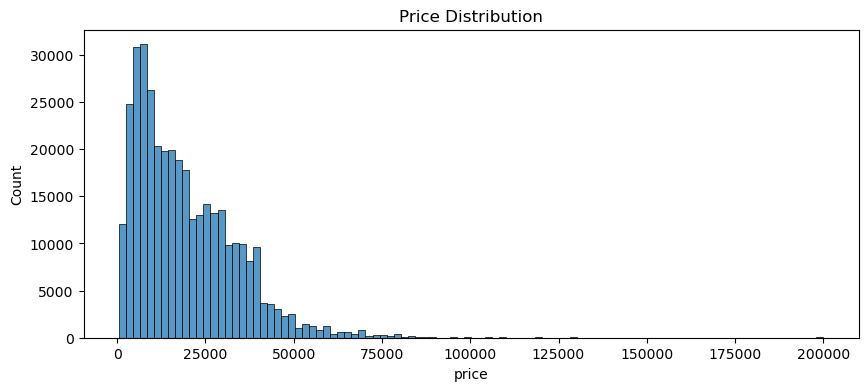

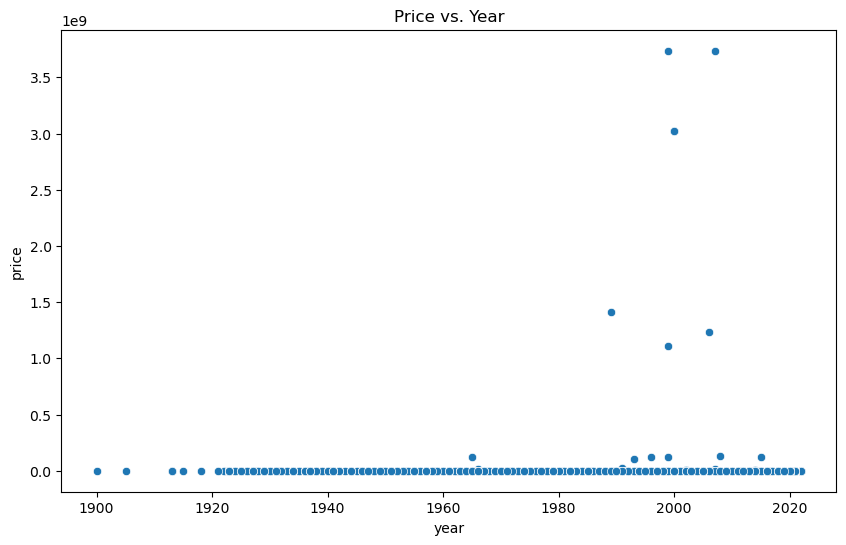

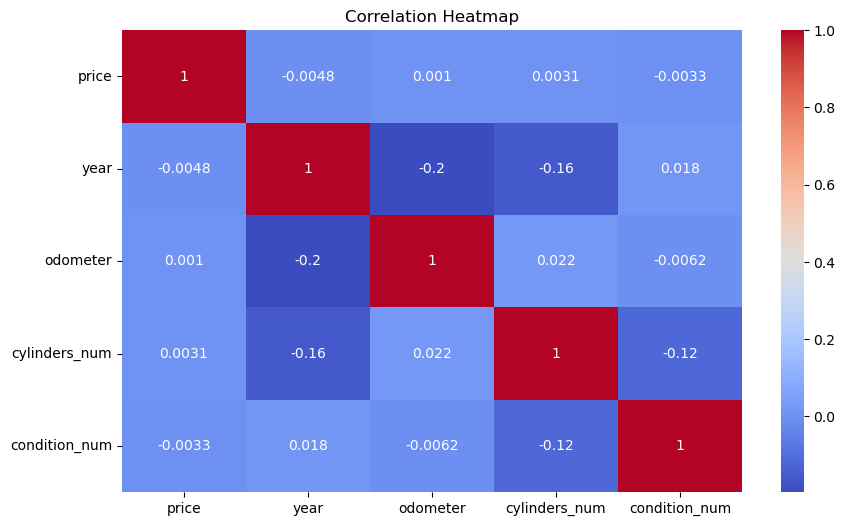

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize Price distribution 
plt.figure(figsize=(10, 4))
sns.histplot(df_original_no_vind['price'].dropna().clip(upper=200000), bins=100)
plt.title('Price Distribution')
plt.show()

# Explore relationships between Price vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df_original_no_vind)
plt.title('Price vs. Year')
plt.show()

# ---------- CORRELATION HEATMAP ----------
corr_cols = ["price","year","odometer","cylinders_num","condition_num"]
plt.figure(figsize=(10,6))
sns.heatmap(df_original_no_vind[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Used car prediction report tailored for Car Dealer
Our analysis focused on identifying the key factors that influence used-car prices. Using multiple regression models, we found that vehicle year, odometer readings, number of cylinders, model, condition etc. show strong correlations with price. These features play a significant role in determining a car’s market value.

### Based on following three models:
    --- Linear Regression
    --- Ridge Regression
    --- RandomForestRegressor Regression

Out of which RandomForestRegressor regression performed way better, compared to remaining two.
##### Here are the results of different models we tested.

    - Linear Regression - MSE:  0.4113294917876986 , RMSE:  0.6413497421748127
    - Ridge Regression - MSE:  0.4113046940582548 , RMSE:  0.6413304094289112
    - RandomForest Regressor - MSE:  0.13491465824932927 , RMSE:  0.3673073076448783

The coefficient of RandomForestRegressor model shows reliable predictions.
##### Here are the coefficient results of RandomForestRegressor model.
-                     feature  importance
- 0                      year    0.377462
- 1                  odometer    0.112289
- 4             cylinders_num    0.064713
- 2                   car_age    0.054557
- 6                model_freq    0.045530
- 62              fuel_diesel    0.039578
- 3            miles_per_year    0.038079
- 77                drive_fwd    0.027932
- 5             condition_num    0.019311
- 92               type_sedan    0.016489
- 45      manufacturer_toyota    0.006629
- 91              type_pickup    0.006554
- 14   manufacturer_chevrolet    0.005460
- 106       paint_color_white    0.005207
- 93               type_truck    0.004950
- 145                state_or    0.004733
- 20        manufacturer_ford    0.004613
- 155                state_wa    0.004302
- 112                state_ca    0.004277
- 27        manufacturer_jeep    0.004237

### Features that influence price
    - Vehicle year - newer cars tend to sell for higher prices
    - Odometer reading - Higher the odometer reading lower the price
    - Cylinders - number of cylinders also moves the price north
    - fuel type - Diesel cars tend to sell at higher price compared to others
    - Car condition - Better/excellent condition provides better value

### Recommendations to dealership
    - Cars with lower age and lower milage will be sold for higher price
    - additionally number of cylinders and disel cars will alsow attract higher price
    - VIN Number data entry is messed up, please revisit
    - Consider adjusting price based on demand of the vehicle in a given state as well as region